# Perturb-seq inference: Wilcoxon test

## Overview
In `wilcoxon-test.R`, we implement the Wilcoxon test in R. It has the following arguments:

- `mudata_input_fp` Path to input `MuData`
- `mudata_output_fp` Path to output `MuData`
- `side` The sidedness of the test (`left`, `right`, or `both`)

For each element-gene pair, it computes the following measures of association:
- `p_value`: A p-value testing the null hypothesis of no association.

## Demonstration

In [12]:
# Load ggplot2 and Wilcoxon code
library(ggplot2)
source("wilcoxon-test.R")
# Define path to the data
inference_data_path <- "/mnt/shared/inference"

In [14]:
# Run the Wilcoxon test on the sample Gasperini data
compute_wilcoxon_test(
  mudata_input_fp = paste0(inference_data_path, "/gasperini_inference_input.h5mu"),
  mudata_output_fp = "gasperini_inference_output_wilcoxon.h5mu",
  side = "left"
)

Warning message:
“sampleMap[['assay']] coerced with as.factor()”


In [18]:
# Preview the first few lines of the results
metadata(output_wilcoxon)$test_results |> 
    as.data.frame() |> 
    head()

,gene_id,intended_target_name,p_value,pair_type
,<chr>,<chr>,<dbl>,<chr>
1,ENSG00000187109,ENSG00000187109,3.030394e-72,positive_control
2,ENSG00000114850,ENSG00000114850,4.672505e-128,positive_control
3,ENSG00000134851,ENSG00000134851,6.398416e-49,positive_control
4,ENSG00000163866,ENSG00000163866,4.183842e-68,positive_control
5,ENSG00000181610,ENSG00000181610,3.903196e-65,positive_control
6,ENSG00000113552,ENSG00000113552,1.360795e-60,positive_control


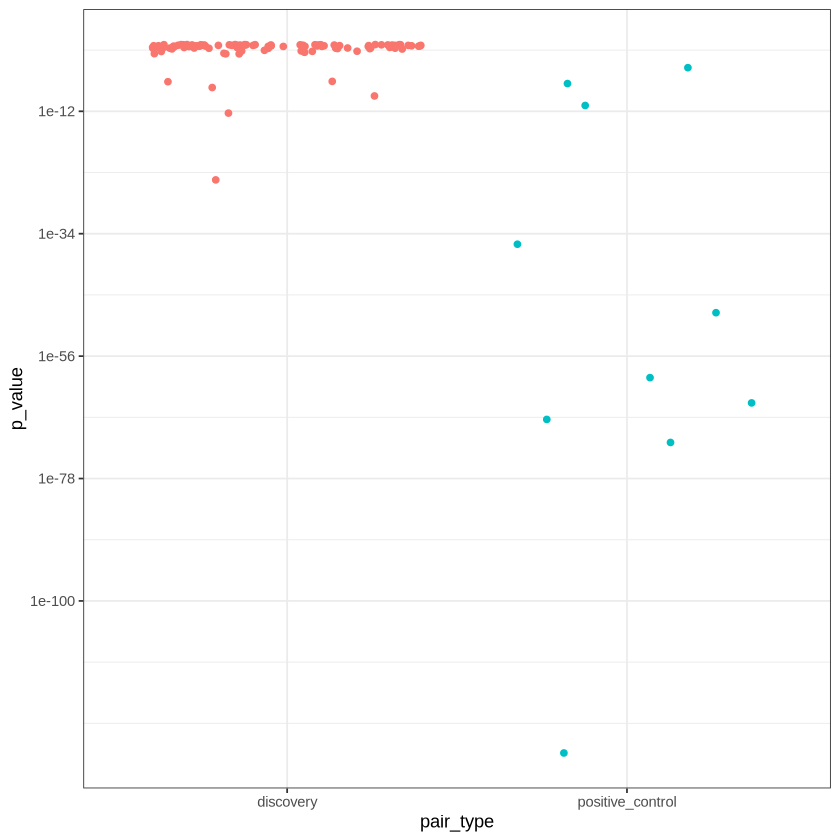

In [26]:
# Create a jitter plot of p-values by pair_type
metadata(output_wilcoxon)$test_results |> 
    as.data.frame() |> 
    ggplot(aes(x = pair_type, color = pair_type, y = p_value)) + 
    geom_jitter() + 
    scale_y_log10() + 
    theme_bw() +
    theme(legend.position = "none")